<a href="https://colab.research.google.com/github/praveenkumarprabakar18/Personal-projects/blob/main/Zomato_data_analysis_8_March_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Zomato-data-.csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
def handlefraction(value):
  value = str(value).split('/')
  value=value[0]
  return float(value)

data['rate'] = data['rate'].apply(handlefraction)

In [8]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0, 0.5, 'Number of Orders')

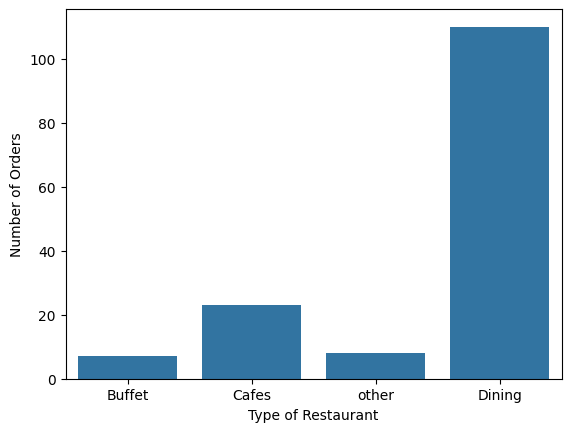

In [12]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Orders')

In [24]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
grouped_data
total_votes = grouped_data.sum()
total_votes
grouped_data = round((grouped_data/total_votes)*100,2)
grouped_data



,votes
listed_in(type),
Buffet,7.73
Cafes,16.42
Dining,51.96
other,23.90


Text(0, 0.5, 'Number of Votes')

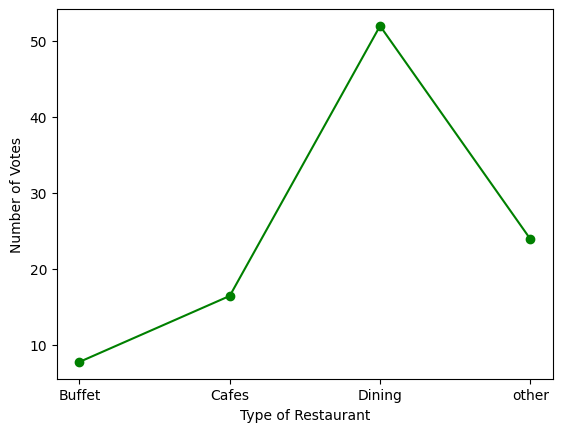

In [25]:
plt.plot(grouped_data, c='green', marker ='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Votes')

In [28]:
max_votes = data['votes'].max()
restaurant_name = data.loc[data['votes'] == max_votes, 'name']
restaurant_name

,name
38,Empire Restaurant


<Axes: xlabel='online_order', ylabel='count'>

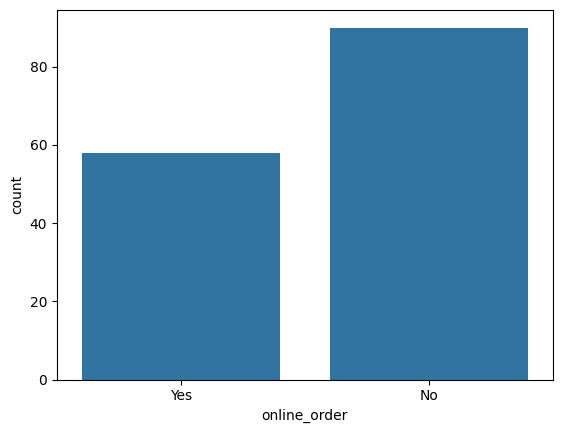

In [31]:
sns.countplot(x=data['online_order'])

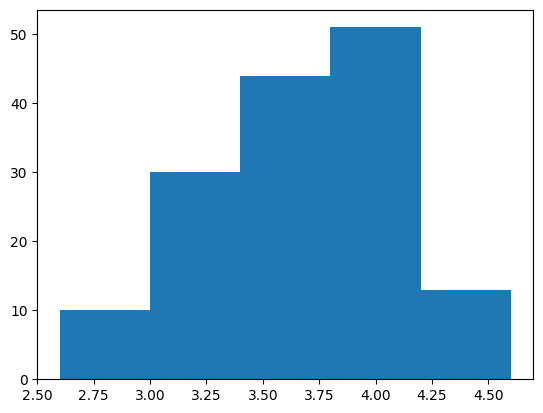

In [7]:
plt.hist(data['rate'], bins = 5)
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

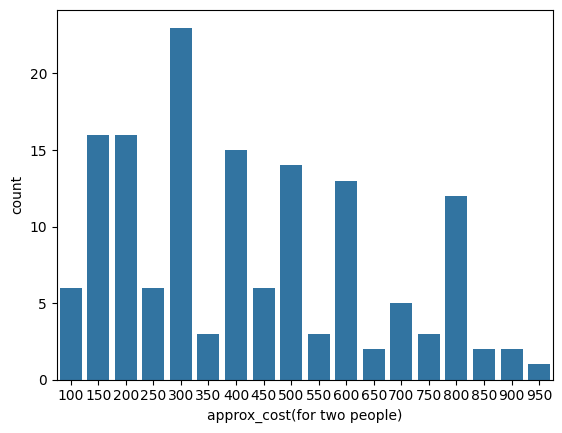

In [13]:
sns.countplot(x= data['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

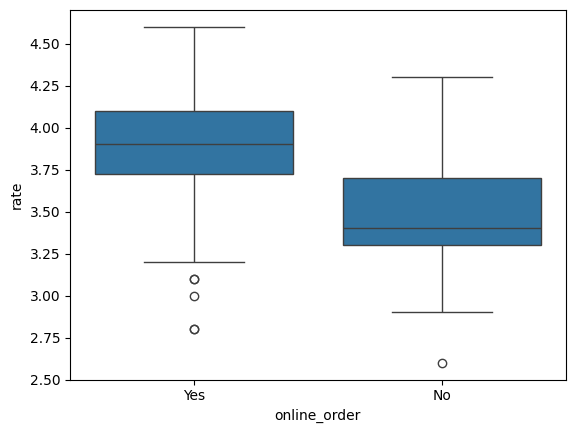

In [15]:
sns.boxplot(x='online_order', y='rate', data = data)

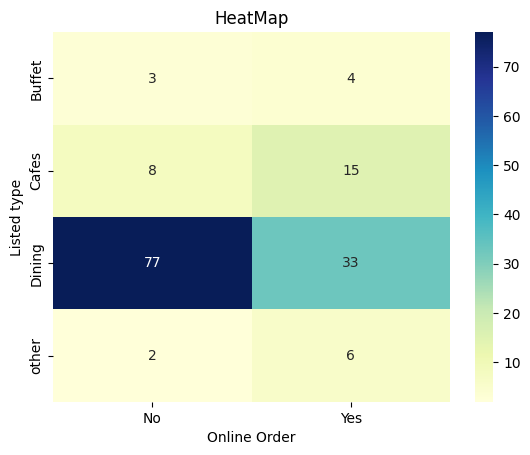

In [21]:
pivot_table = data.pivot_table(index = 'listed_in(type)', columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot= True, cmap = 'YlGnBu', fmt = 'd')
plt.title('HeatMap')
plt.xlabel('Online Order')
plt.ylabel('Listed type')
plt.show()
